
----


# **Task 4: Findings & Recommendations - Customer Churn Prediction**

<h1 style="font-family: 'poppins'; font-weight: bold; color: Blue;">Author: Muhammad Adil Naeem</h1>

[![GitHub](https://img.shields.io/badge/GitHub-Profile-green?style=for-the-badge&logo=github)](https://github.com/muhammadadilnaeem) [![Twitter/X](https://img.shields.io/badge/Twitter-Profile-red?style=for-the-badge&logo=twitter)](https://twitter.com/adilnaeem0) [![LinkedIn](https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin)](https://www.linkedin.com/in/muhammad-adil-naeem-26878b2b9/)  

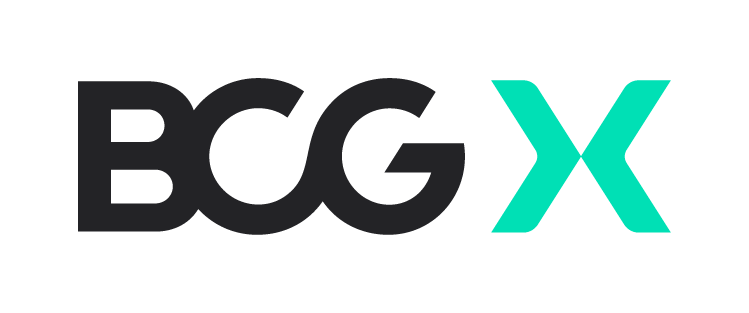

## **What is classification?**
When you are trying to predict an outcome, the result that you’re trying to predict can either be:

- A continuous number, e.g. an employees salary
- Or a discrete value, e.g. a job title
  
In our example, we are trying to predict whether or not a client will churn, so it will only ever been 1 of 2 values (True/False, 1/0, etc…).

If the outcome that you’re trying to predict has a fixed number of discrete values, this is a classification problem, as you are trying to “classify” the observations in the data. If the outcome is a continuous number, this is a regression problem. We will not cover regression problems in this task.

## **Objectives**

- In this Notebook our Aim is to Train RandomForestClassifier on provided data and then evaluate the performance of the Model.

### **Importing Libraries / Packages**

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree

### **Load the Provided Data**

In [27]:
df = pd.read_csv(r"C:\Users\user\Downloads\BCGX Customer Churn Project\data_for_predictions.csv")
df.drop(columns=["Unnamed: 0"], inplace=True)

### **Take a Look at First 5 rows of Data**

In [28]:
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,40.606701,...,2,6,0,0,1,0,0,0,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,...,76,4,1,0,0,0,0,1,0,0
2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,...,68,8,0,0,1,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,44.311378,...,69,9,0,0,0,1,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,40.606701,...,71,9,1,0,0,0,0,1,0,0


----

## **Random Forest Model Training**


----

- **And how does a Random Forest work?**

A random forest is a supervised learning algorithm which means that you must provide the algorithm with a set of features, as well as the outcome that you’re trying to predict, in our case churn.

The way it makes predictions is by building a set of decision trees on different samples of the data and by taking a majority vote to decide what prediction to make.

#### **Data sampling**

- The first thing we want to do is split our dataset into training and test samples. 
- The reason why we do this, is so that we can simulate a real life situation by generating predictions for our test sample, without showing the predictive model these data points. 
- This gives us the ability to see how well our model is able to generalise to new data, which is critical.

A typical % to dedicate to testing is between 20-30, for this example we will use a 75-25% split between train and test respectively.

#### **Make a copy of our data**

In [29]:
train_df = df.copy()

#### **Separate target variable from independent variables**

In [30]:
y = df['churn']  # Dependent Variable
X = df.drop(columns=['id', 'churn'])    # Independent Variable
print(X.shape)
print(y.shape)

(14606, 61)
(14606,)


#### **Split the Data into Train and Test**

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#### **Let's Check Shape of Dataset After Splitting Into Train and Test**

In [32]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10954, 61)
(10954,)
(3652, 61)
(3652,)


Sure! Let's make this text more engaging and exciting for readers:

---

### 🌟 **Model Training: The Magic Behind Random Forests!** 🌟

Ready to dive into the forest? 🌳 Today, we're unleashing the power of the **`Random Forest`** classifier! This isn't just any model—it's an **`ensemble`** algorithm, which means it’s like having a whole team of decision-makers working together. 🧠💡 Think of the "Forest" as a bustling community of **`Decision Trees`**, each one learning and growing based on the data you feed it.

So, why is this **`ensemble`** approach so powerful? Let's break it down:

1. **Strength in Numbers:** Imagine relying on just one decision tree—it might overfit, underfit, or simply miss the mark. But what if you had **hundreds or thousands** of trees, each analyzing different slices of data? 🌱 This is where the magic happens! Instead of putting all your faith in one model, **Random Forest** leverages the collective wisdom of many, just like gathering advice from 1,000 coders—you’ll get a variety of insights, methods, and strategies! 👩‍💻👨‍💻

2. **Weak Learners, Strong Outcomes:** The beauty of **Random Forest** lies in its use of "weak learners"—models trained to find subtle, not-so-obvious patterns in the data. 🕵️‍♂️ While each tree might not be perfect on its own, together, they create a predictive powerhouse! It's a real-life example of "many brains are better than one." 🧠🌟

3. **Democracy in Action:** When it’s time to make a prediction, the **Random Forest** doesn’t just ask one tree—it consults the entire forest! 🌲 The trees either **vote** on the best prediction or use an averaging method to reach a consensus. The more trees you have, the closer your model gets to its best possible solution. 🌟🏆

**Why Random Forest Rocks** 🎉

- **No Need to Scale:** Unlike some models that rely on distance calculations, the Random Forest uses a rule-based approach, meaning your features don’t need to be scaled. 🚀
- **Master of Non-Linearity:** Random Forests excel at handling non-linear parameters, which is often where linear models stumble. 🔄

**But Wait, There’s a Catch…** ⚠️

- **Power Hungry:** Training a Random Forest on a large dataset demands significant computational power because you’re building an entire ensemble of models. 💻🔥
- **Time-Intensive:** With great power comes great complexity—the larger the forest, the longer the training time. ⏳

---

#### **Load the RandomForestClassifer Model**

In [33]:
model = RandomForestClassifier()

#### **Fit the Model on The Trainig Data**

In [34]:
model.fit(X_train, y_train)

RandomForestClassifier()

#### **Predict on the test data**

In [35]:
y_pred = model.predict(X_test)

#### **Evaluate the model**

In [36]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9033406352683461


In [37]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95      3286
           1       0.78      0.05      0.09       366

    accuracy                           0.90      3652
   macro avg       0.84      0.52      0.52      3652
weighted avg       0.89      0.90      0.86      3652



### **Hyperparameter Tuning Overview:**

**Hyperparameter tuning** is the process of finding the optimal set of hyperparameters for a machine learning model to improve its performance. Hyperparameters are parameters that are not learned from the data but are set before the training process begins (e.g., the number of trees in a RandomForest, the maximum depth of each tree, etc.).

### How Hyperparameter Tuning is Used in This Code:

1. **Parameter Grid Definition**: 
   - A grid of possible hyperparameter values is defined using `param_grid`.
   - Example parameters include `n_estimators` (number of trees), `max_depth` (maximum depth of each tree), `min_samples_split` (minimum samples required to split a node), etc.

2. **GridSearchCV**:
   - `GridSearchCV` is used to perform an exhaustive search over the specified hyperparameter grid.
   - It evaluates every combination of hyperparameters using cross-validation (in this case, 3-fold CV) to determine which combination yields the best performance.

3. **Model Selection**:
   - The `best_estimator_` from `GridSearchCV` is the `RandomForestClassifier` with the best set of hyperparameters.
   - This optimized model is then used to make predictions and evaluate performance.

### Why Hyperparameter Tuning is Used:

- **Improve Model Performance**: By finding the best hyperparameters, the model is better suited to the specific dataset, leading to improved accuracy and generalization.
- **Prevent Overfitting/Underfitting**: Proper tuning can prevent overfitting (model too complex) or underfitting (model too simple), ensuring the model performs well on unseen data.
- **Optimization**: It helps in utilizing the model’s full potential by fine-tuning parameters that directly affect model complexity and performance. 

In summary, hyperparameter tuning helps in finding the most effective configuration for the `RandomForestClassifier`, leading to better and more reliable predictions.

In [38]:
# Optimize with GridSearchCV
param_grid = {
    'n_estimators': [100, 200],  # Reduced number of trees
    'max_depth': [10, 20],       # Reduced maximum depth
    'min_samples_split': [2, 5], # Reduced number of samples required to split an internal node
    'min_samples_leaf': [1, 2],  # Reduced number of samples required to be at a leaf node
    'bootstrap': [True]          # Keep only one bootstrap option for simplicity
}


### **Perform the Grid Search**

In [39]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

### **Fit the Grid Search**

In [40]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=2)

### **Get the best model and predict**

In [41]:
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)

### **Evaluate the optimized model**

In [42]:
print("Optimized Accuracy:", accuracy_score(y_test, y_pred_best))
print("Optimized Classification Report:\n", classification_report(y_test, y_pred_best))

Optimized Accuracy: 0.9027929901423878
Optimized Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95      3286
           1       0.76      0.04      0.08       366

    accuracy                           0.90      3652
   macro avg       0.83      0.52      0.52      3652
weighted avg       0.89      0.90      0.86      3652



### **Function to plot the confusion matrix**

In [43]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

### **Function to plot a decision tree**

In [44]:
import pydot
from sklearn.tree import export_graphviz
from graphviz import Source
import os
import subprocess

def plot_decision_tree(model, title, output_file='decision_tree.html'):
    # Check if Graphviz is installed
    try:
        subprocess.run(['dot', '-V'], check=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    except (FileNotFoundError, subprocess.CalledProcessError):
        print("Graphviz is not installed or not found in PATH. Please install Graphviz and add it to your PATH.")
        return
    
    # Export the tree to a dot file
    dot_data = export_graphviz(
        model.estimators_[0],
        out_file=None,
        feature_names=X.columns,
        filled=True,
        rounded=True,
        special_characters=True
    )

    # Create a Source object
    graph = Source(dot_data)
    
    # Save the graph as PNG
    png_file = 'temp_tree.png'
    graph.render(filename='temp_tree', format='png', cleanup=False)
    
    # Create HTML content
    html_content = f'''
    <html>
    <body>
    <h1>{title}</h1>
    <img src="{png_file}" alt="Decision Tree">
    </body>
    </html>
    '''
    
    # Write HTML content to a file
    with open(output_file, 'w') as file:
        file.write(html_content)
    
    print(f'Decision tree saved to {output_file}. Open this file in your browser to view the tree.')


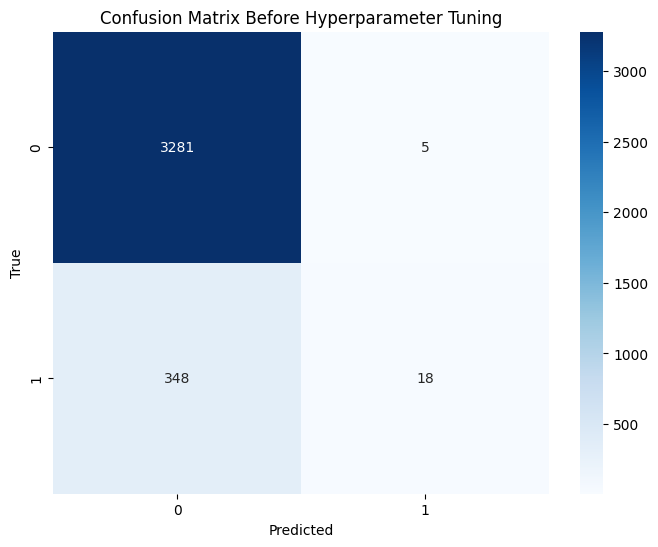

In [45]:
# Confusion Matrix before hyperparameter tuning
plot_confusion_matrix(y_test, y_pred, title='Confusion Matrix Before Hyperparameter Tuning')

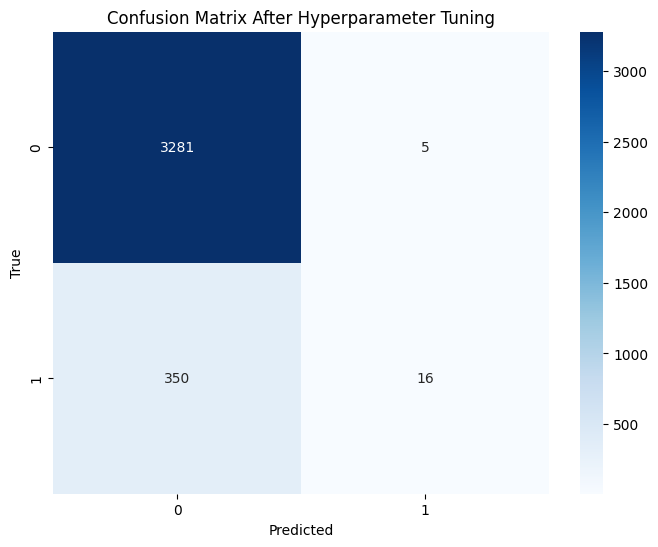

In [46]:
# Confusion Matrix after hyperparameter tuning
plot_confusion_matrix(y_test, y_pred_best, title='Confusion Matrix After Hyperparameter Tuning')

### **Decision Tree Visualization**

In [47]:
plot_decision_tree(model, title='Decision Tree Before Hyperparameter Tuning', output_file='decision_tree_before.html')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.539383 to fit


Decision tree saved to decision_tree_before.html. Open this file in your browser to view the tree.


In [48]:
plot_decision_tree(best_rf, title='Decision Tree After Hyperparameter Tuning', output_file='decision_tree_after.html')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.589504 to fit


Decision tree saved to decision_tree_after.html. Open this file in your browser to view the tree.


In [49]:
feature_importances = pd.DataFrame({
    'features': X_train.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()

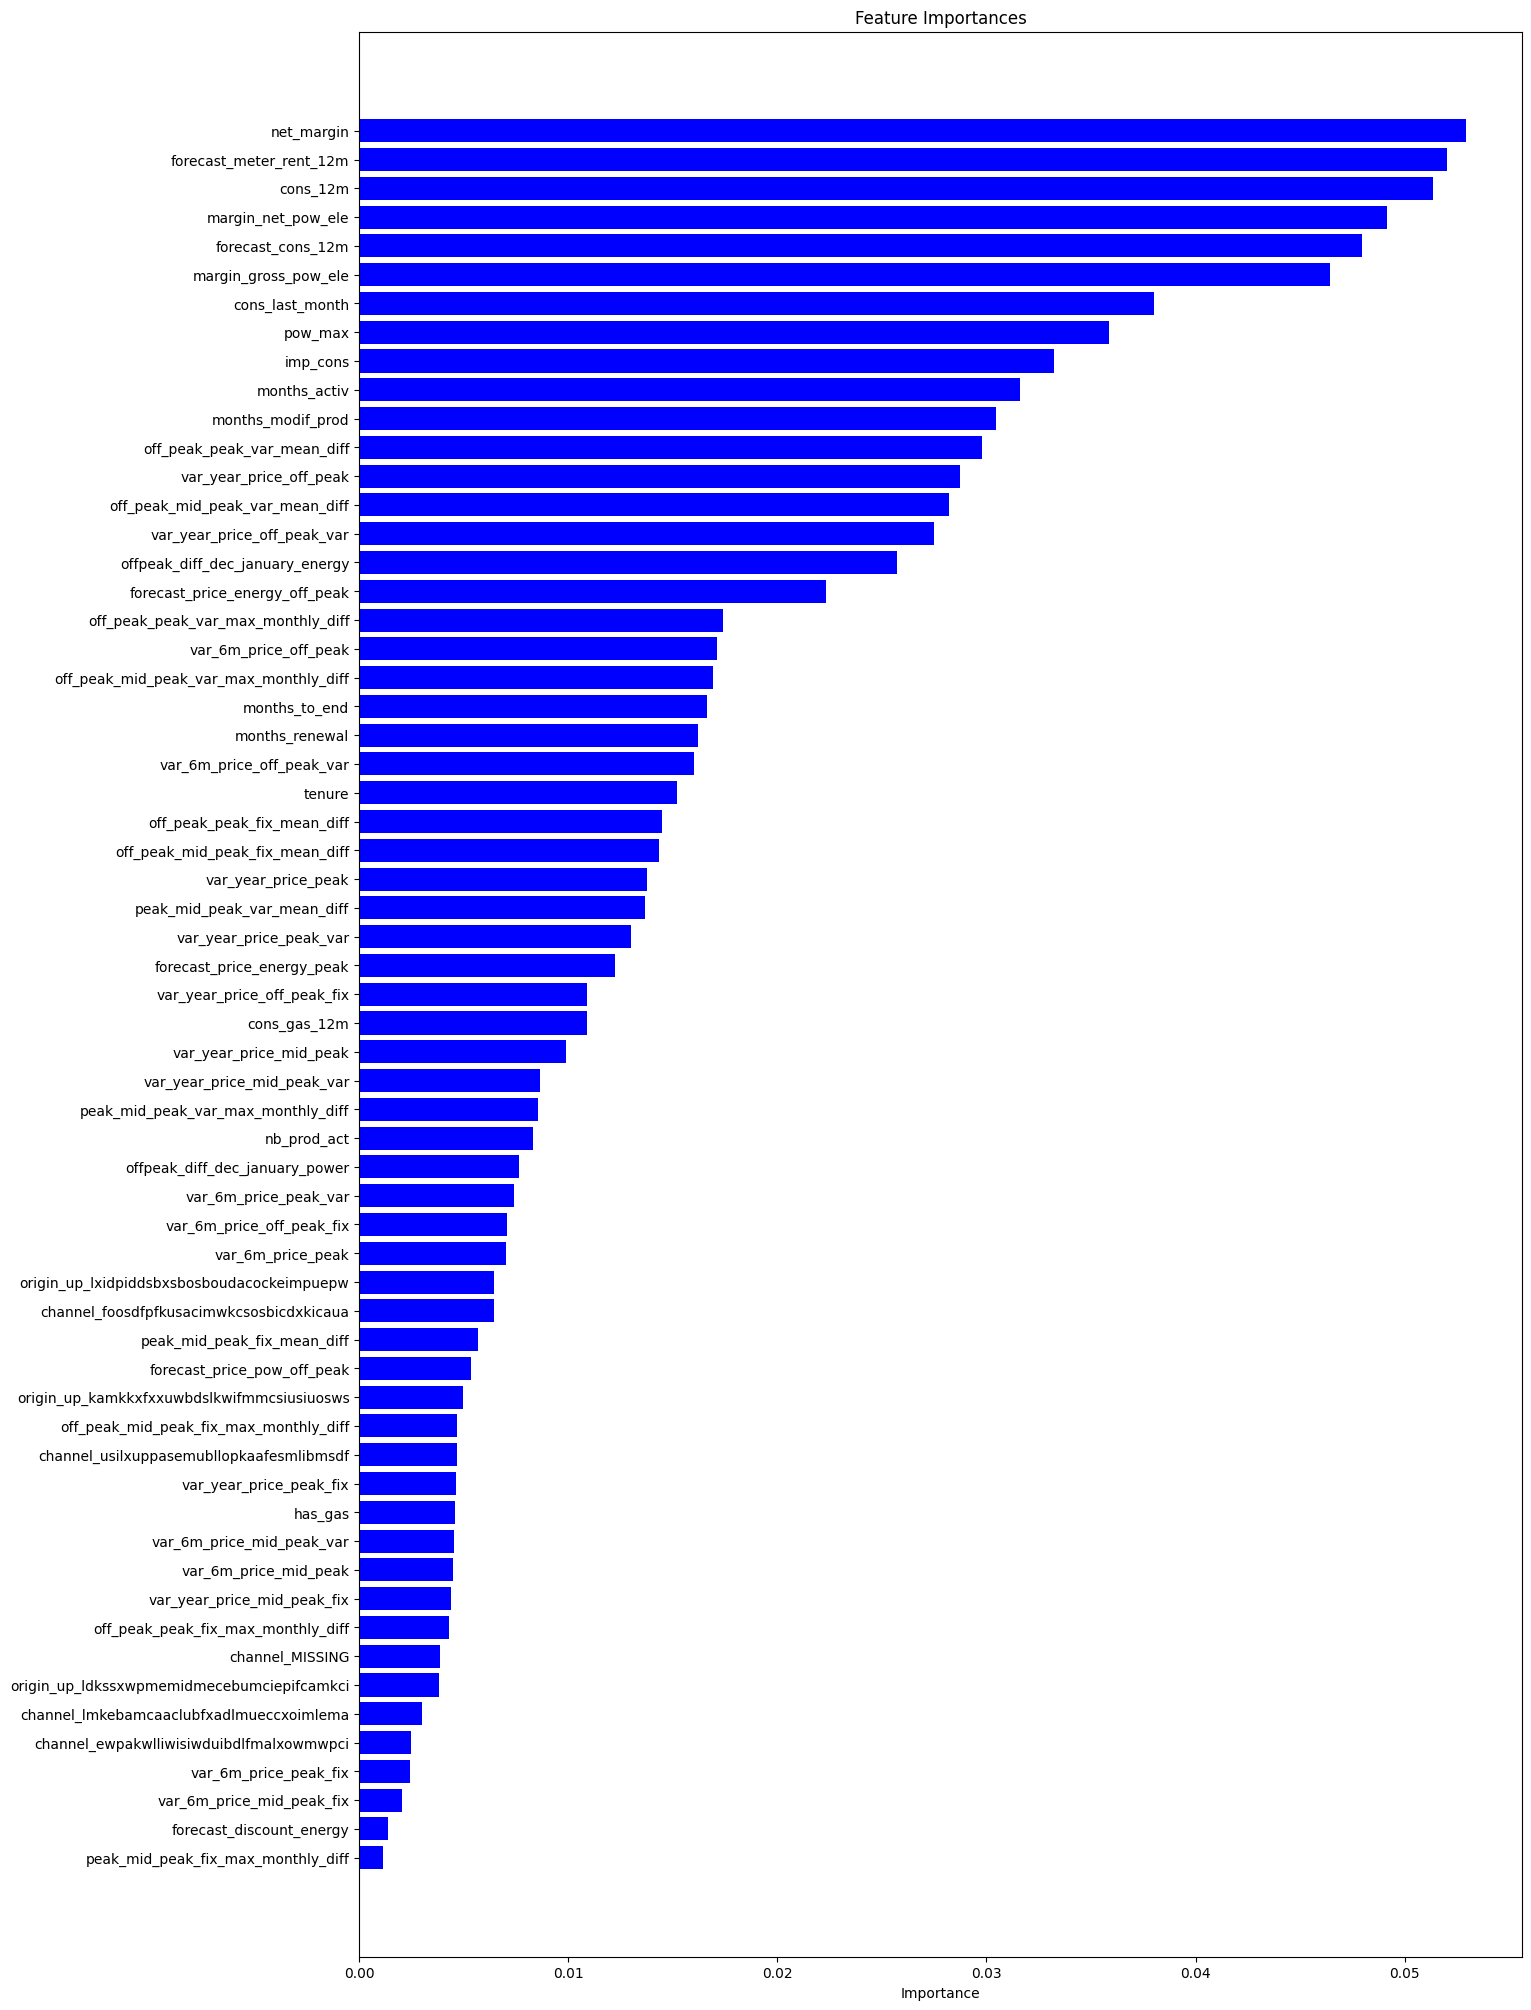

In [50]:
plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()

From this chart, we can observe the following points:

- Net margin and consumption over 12 months is a top driver for churn in this model
- Margin on power subscription also is an influential driver
- Time seems to be an influential factor, especially the number of months they have been active, their tenure and the number of months since they updated their contract
- The feature that our colleague recommended is in the top half in terms of how influential it is and some of the features built off the back of this actually outperform it
- Our price sensitivity features are scattered around but are not the main driver for a customer churning




### **1. Why did you choose the evaluation metrics that you used? Please elaborate on your choices.**

In the context of customer churn prediction, the choice of evaluation metrics is crucial for understanding model performance. Common metrics include:

- **Accuracy**: Measures the percentage of correct predictions. Useful for balanced datasets but can be misleading if classes are imbalanced.
- **Precision**: Indicates how many of the predicted churns were actual churns. Important when the cost of false positives is high.
- **Recall (Sensitivity)**: Shows how many actual churns were captured by the model. Crucial when missing a churn is costly.
- **F1 Score**: The harmonic mean of precision and recall. Useful when the dataset is imbalanced, as it balances the trade-off between precision and recall.

These metrics were likely chosen to provide a comprehensive view of the model's strengths and weaknesses, especially in handling class imbalance which is common in churn datasets.

### **2. Do you think that the model performance is satisfactory? Give justification for your answer.**

To determine if the model performance is satisfactory, consider the following:

- **Accuracy**: If the accuracy is high and the dataset is balanced, it indicates good performance. However, for imbalanced data, accuracy alone is not sufficient.
- **F1 Score**: A high F1 score suggests a good balance between precision and recall, indicating the model effectively identifies churns without many false positives.
- **Confusion Matrix**: Analyze the true positives, false positives, true negatives, and false negatives to understand misclassification patterns.

If all metrics indicate high performance, with an emphasis on precision, recall, and F1 score, the model can be considered satisfactory. Otherwise, further tuning or different model approaches may be necessary.

#### **Presentation and Explanations**

The notebook should clearly present these metrics with detailed comments explaining the significance of each. Graphical representations like confusion matrices enhance understanding. Ensure that each step in the analysis is well-documented, providing context for the choices made and the results obtained.

-----

## **Final Thoughts**



### **Important Features**

1. **Feature Importance Scores**: Models like Random Forest provide feature importance scores. Features with higher scores contribute more to the model's predictions.

### **Common Important Features in Churn Prediction**

- **Contract Type**: Customers on month-to-month contracts might be more likely to churn compared to those on long-term contracts.
- **Tenure**: Longer-tenured customers might be less likely to churn due to established habits or satisfaction.
- **Monthly Charges**: Higher charges could lead to higher churn if perceived as too costly.
- **Customer Service Calls**: A high number of calls might indicate dissatisfaction, leading to higher churn.

### **Why These Features Are Important**

- **Predictive Power**: These features often show a strong correlation with customer churn based on historical data.
- **Business Relevance**: They provide actionable insights, allowing businesses to target specific areas like contract adjustments or customer service improvements.
